<a href="https://colab.research.google.com/github/FlavianusPutratama/Metnum_Pertemuan13_Flavianus_Putratama/blob/main/metnum_pertemuan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N = 10, Approximation = 3.141592613939215, RMS Error = 3.965057793209326e-08, Execution Time = 0.000290 seconds
N = 100, Approximation = 3.141592653589754, RMS Error = 3.907985046680551e-14, Execution Time = 0.000090 seconds
N = 1000, Approximation = 3.141592653589793, RMS Error = 0.000000000000000e+00, Execution Time = 0.000079 seconds
N = 10000, Approximation = 3.141592653589794, RMS Error = 4.440892098500626e-16, Execution Time = 0.000175 seconds


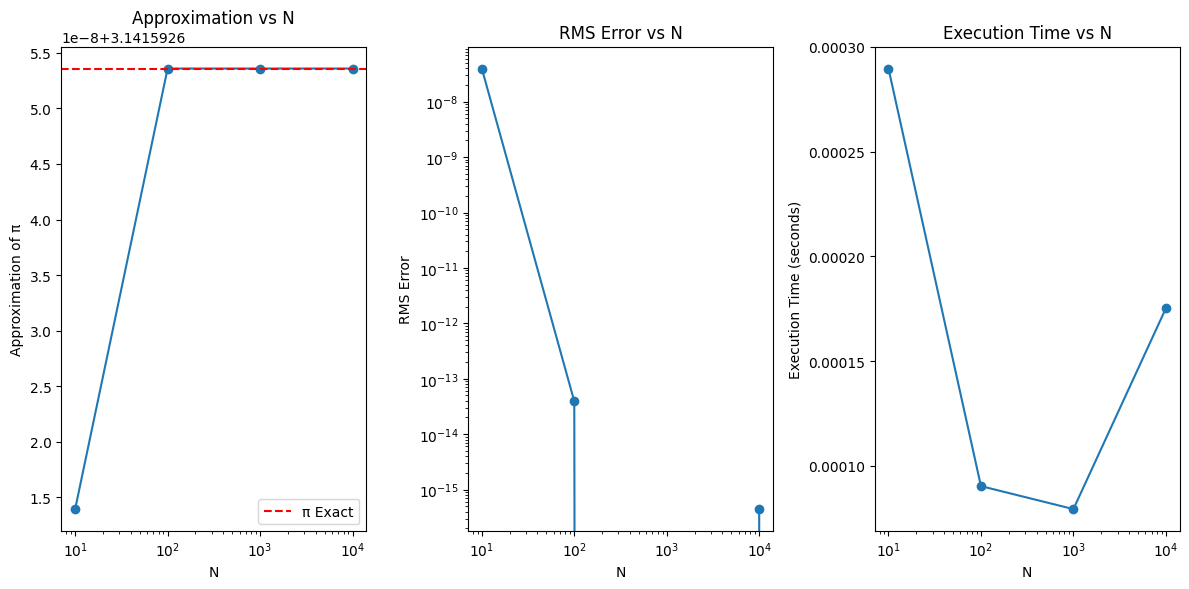

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Fungsi yang akan diintegrasikan
def f(x):
    return 4 / (1 + x**2)

# Implementasi metode Simpson 1/3
def simpson_1_3(f, a, b, N):
    if N % 2 == 1:
        raise ValueError("N harus genap.")
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = f(x)
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return h / 3 * S

# Fungsi untuk menghitung galat RMS
def rms_error(approx, exact):
    return np.sqrt(np.mean((approx - exact) ** 2))

# Pengujian dengan variasi nilai N
def test_simpson(N_values, exact_value):
    results = []
    for N in N_values:
        start_time = time.time()
        approx_value = simpson_1_3(f, 0, 1, N)
        exec_time = time.time() - start_time
        error = rms_error(approx_value, exact_value)
        results.append((N, approx_value, error, exec_time))
    return results

# Nilai referensi pi
exact_pi = 3.14159265358979323846

# Variasi nilai N
N_values = [10, 100, 1000, 10000]

# Melakukan pengujian
results = test_simpson(N_values, exact_pi)

# Menampilkan hasil pengujian
for N, approx, error, exec_time in results:
    print(f"N = {N}, Approximation = {approx:.15f}, RMS Error = {error:.15e}, Execution Time = {exec_time:.6f} seconds")

# Memisahkan hasil untuk plotting
N_values, approx_values, errors, exec_times = zip(*results)

# Plot nilai aproksimasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(N_values, approx_values, marker='o')
plt.axhline(y=exact_pi, color='r', linestyle='--', label='π Exact')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Approximation of π')
plt.title('Approximation vs N')
plt.legend()

# Plot galat RMS
plt.subplot(1, 3, 2)
plt.plot(N_values, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('RMS Error')
plt.title('RMS Error vs N')

# Plot waktu eksekusi
plt.subplot(1, 3, 3)
plt.plot(N_values, exec_times, marker='o')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs N')

plt.tight_layout()
plt.show()
